Create financial dataset of 3 big technologies using `quandl` package

Useful links

* Search QUANDL CODE: https://www.quandl.com/search?query=facebook

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import quandl
import pandas as pd
import matplotlib.dates as dates
quandl.ApiConfig.api_key = 'a5JKbmNDb4k98huTPMcY'

In [2]:
import os
def load_stock_datasets():
    data_file = "stocks.xlsx"
    if os.path.isfile(data_file):
        stocks = pd.read_excel(data_file)
    else:
        quandl.ApiConfig.api_key = 'a5JKbmNDb4k98huTPMcY'
        google = quandl.get('WIKI/GOOGL')
        google["Company"] = "Google"
        facebook = quandl.get('WIKI/FB')
        facebook["Company"] = "Facebook"
        apple = quandl.get('WIKI/AAPL')
        apple["Company"] = "Apple"
        stocks = pd.concat([apple, facebook, google])
        stocks = stocks.reset_index()
        stocks.to_excel(data_file, index=False)
    return stocks

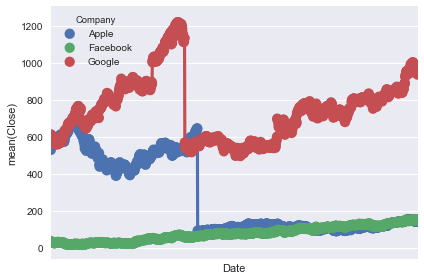

In [30]:
stocks = load_stock_datasets()
stocks = stocks[stocks["Date"] >= "2012-05-18"]
ax = plt.subplot()
ax = sns.pointplot(data=stocks, x="Date", y="Close", hue="Company")
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.show()